In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the dataset- AIRBNB rentals in Amsterdam 
dataset = pd.read_csv('airbnbamsterdam1.csv')
X = dataset.iloc[:,:].values


In [14]:
dataset.shape


(5645, 14)

In [15]:
dataset.head(10)


,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,2818,3159,Private room,NaN,Oostelijk Havengebied / Indische Buurt,77,5.0,2,1.0,90.0,3,52.365755,4.941419,2014-05-24 14:44:31.832
1,6243,3813,Private room,NaN,Oostelijk Havengebied / Indische Buurt,116,4.5,4,1.0,75.0,2,52.379212,4.926324,2014-05-24 17:16:02.491
2,15061,59297,Private room,NaN,Westerpark,53,5.0,4,1.0,66.0,2,52.382685,4.876130,2014-05-24 20:01:54.098
3,15865,59484,Private room,NaN,Centrum Oost,1,5.0,4,1.0,151.0,3,52.363786,4.893392,2014-05-24 21:52:07.540
4,20168,59484,Private room,NaN,Centrum Oost,4,4.0,2,1.0,90.0,3,52.365087,4.893541,2014-05-24 20:36:24.643
5,20522,77484,Entire home/apt,NaN,De Pijp / Rivierenbuurt,139,4.5,2,1.0,92.0,2,52.354818,4.888065,2014-05-24 15:46:47.530
6,22315,10378458,Entire home/apt,NaN,Oud Oost,6,4.0,6,2.0,153.0,3,52.357946,4.916384,2014-05-24 15:48:44.487
7,23651,9616,Private room,NaN,De Pijp / Rivierenbuurt,36,5.0,3,1.0,122.0,6,52.345911,4.891983,2014-05-24 17:16:35.801
8,25488,106225,Entire home/apt,NaN,Oostelijk Havengebied / Indische Buurt,46,4.5,6,3.0,229.0,3,52.365010,4.943572,2014-05-24 18:25:26.164
9,27573,119217,Private room,NaN,Centrum Oost,53,4.5,2,1.0,174.0,3,52.364293,4.897716,2014-05-24 22:09:41.484


In [16]:
dataset.dtypes  #discovering data types

room_id                   int64
host_id                   int64
room_type                object
borough                 float64
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
minstay                   int64
latitude                float64
longitude               float64
last_modified            object
dtype: object

In [17]:
dataset['price'].describe() #Descriptive statistics on numerical variable price

count    5645.000000
mean      191.353942
std       134.291993
min        23.000000
25%       122.000000
50%       153.000000
75%       228.000000
max      4588.000000
Name: price, dtype: float64

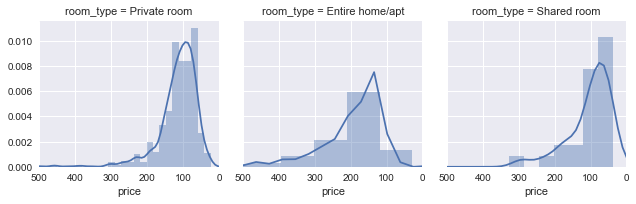

In [3]:
#using seaborn for visualization
#Facetgrid of room type and prices ( of rooms priced till 500)
g = sns.FacetGrid(dataset, col="room_type",xlim=500) 
g.map(sns.distplot, "price")
sns.plt.show()

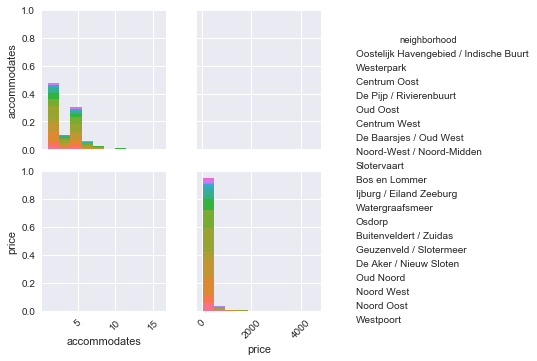

In [4]:
#pairplots useful to plot different plots together on various variables- this can include residual and regression plots
g = sns.pairplot(dataset[["accommodates", "price" ,"neighborhood"]], hue="neighborhood", kind="hist")

for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
    
sns.plt.show()


In [ ]:
#Model-1 
#Predicting Price -Continous Variable using Random Forest Regressor, using overall satisfaction, bedrooms,accommodates 
#   Steps- 
#Preprocessing- Split data into X matrix of independant variables and Y vector, 
#build regressor using sklearn 
#     Visualize results


In [1]:
# Model-2 
#Predict in which neighborhood a potential customer will book an AIRBNB using SVM Classifier 
#   Steps- 
#Preprocessing- Split data into training and test set 
#Build Classifier using SKLEARN 
#      Visualize results
#Find accuracy using K-fold cross validation 
#Find Hyperparameters for SVM using Grid Search 
#      Visualize Optimized results using best parameters

In [4]:
# Importing the dataset
dataset = pd.read_csv('airbnbamsterdam1.csv')
X = dataset.iloc[:, 6:9].values
y = dataset.iloc[:, 9].values


In [5]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 0:3])
X[:, 0:3] = imputer.transform(X[:, 0:3])

In [6]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [7]:
y_pred = regressor.predict(X)

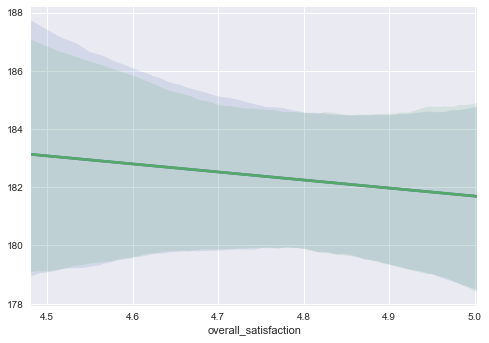

In [9]:
#Visualize Overall Satisfaction and predicted price

sns.regplot(x="overall_satisfaction", y=y_pred, data=dataset,fit_reg=True,y_jitter=0.03,scatter=False)
sns.plt.show()

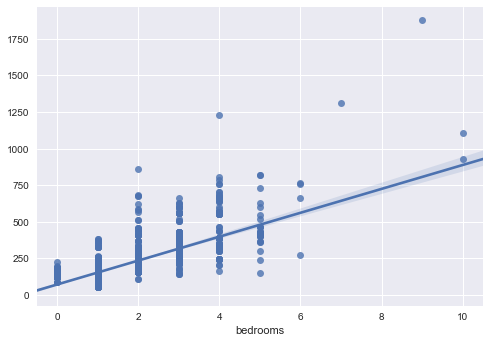

In [10]:
#visualize Number of bedrooms and predicted price
sns.regplot(x="bedrooms", y=y_pred, data=dataset)
sns.plt.show()

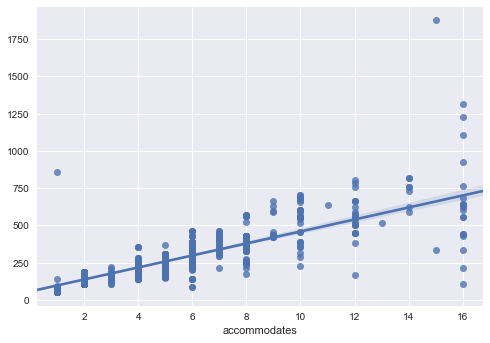

In [11]:
#visualize Maximum people accommodated and predicted price
sns.regplot(x="accommodates", y=y_pred, data=dataset)
sns.plt.show()